In [1]:
#import necessary packages
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import sys
import os #OS commands
import zipfile
import io #file in/out
import requests #http requests

#data manipulation
import numpy as np
import json
import pandas as pd


#geo libraries
import geopandas as gpd
import shapely
from fiona.crs import from_epsg

#plotting
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl https://data.cityofnewyork.us/api/views/k46n-sa2m/rows.csv?accessType=DOWNLOAD > dhsdaily.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k    0  146k    0     0   130k      0 --:--:--  0:00:01 --:--:--  130k


In [3]:
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


In [4]:
!mv dhsdaily.csv $PUIDATA

In [5]:
!ls $PUIDATA

201501-citibike-tripdata.csv			     MN_Dcp_Mappinglot.dbf
201501-citibike-tripdata.zip			     MN_Dcp_Mappinglot.prj
201808-citibike-tripdata.csv			     MN_Dcp_Mappinglot.sbn
201808-citibike-tripdata.csv.zip		     MN_Dcp_Mappinglot.sbx
acs15_final.csv					     MN_Dcp_Mappinglot.shp
ACS_17_1YR_GCT2801.ST50_metadata.csv		     MN_Dcp_Mappinglot.shp.xml
ACS_17_1YR_GCT2801.ST50.txt			     MN_Dcp_Mappinglot.shx
ACS_17_1YR_GCT2801.ST50_with_ann.csv		     MNMapPLUTO.BBL.atx
ACS_17_1YR_GCT2801.ST50.zip			     MNMapPLUTO.CD.atx
aff_download_readme_ann.txt			     MNMapPLUTO.dbf
BK_18v1.csv					     MNMapPLUTO.LandUse.atx
citywidepayroll.csv				     MNMapPLUTO.prj
Citywide_Payroll_Data__Fiscal_Year_.csv		     MNMapPLUTO.sbn
dhsdaily.csv					     MNMapPLUTO.sbx
energy.csv					     MNMapPLUTO.shp
file.gz						     MNMapPLUTO.shp.xml
geo_export_8504fa16-6f0f-455f-a6fc-1437ff0abd25.dbf  MNMapPLUTO.shx
geo_export_8504fa16-6f0f-455f-a6fc-1437ff0abd25.prj  MNMapPLUTO.ZoneDist1.atx
geo_export_8504fa16-6f0f

In [6]:
data=pd.read_csv(os.getenv("PUIDATA") + "/dhsdaily.csv", parse_dates=[0], index_col=0 )
#, parse_dates=[0], usecols=[0,2,3], infer_datetime_format=True, nrows=100000, na_values='?', keep_default_na=True)

In [7]:
pd.read_csv?

In [8]:
data

,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
Date of Census,,,,,,,,,,,,
2013-08-21,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811
2013-08-22,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827
2013-08-23,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826
2013-08-24,28274,21343,49617,7110,2690,9800,10291,14650,21343,35993,1801,3824
2013-08-25,28458,21400,49858,7230,2704,9934,10324,14694,21400,36094,1804,3830
2013-08-26,28485,21392,49877,7252,2704,9956,10307,14688,21392,36080,1809,3841
2013-08-27,28414,21322,49736,7209,2713,9922,10277,14640,21322,35962,1813,3852
2013-08-28,28428,21325,49753,7229,2721,9950,10284,14647,21325,35972,1803,3831
2013-08-29,28396,21412,49808,7151,2709,9860,10316,14696,21412,36108,1807,3840


Text(0,0.5,'Count of Individuals')

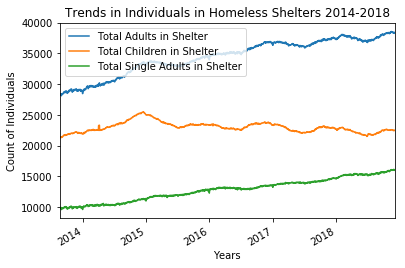

In [9]:
data['Total Adults in Shelter'].plot()
data['Total Children in Shelter'].plot()
data['Total Single Adults in Shelter'].plot()
plt.legend()
plt.title('Trends in Individuals in Homeless Shelters 2014-2018')
plt.xlabel('Years')
plt.ylabel('Count of Individuals')


In [10]:
data['Total Adult Families + other']=data['Individuals in Adult Families in Shelter']+data['Total Children in Shelter']
data['Total Adults in Shelter + kids']=data['Total Adult Families + other']+data['Total Single Adults in Shelter']

In [11]:
data

,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter,Total Adult Families + other,Total Adults in Shelter + kids
Date of Census,,,,,,,,,,,,,,
2013-08-21,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811,25125,35066
2013-08-22,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827,25151,35068
2013-08-23,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826,25117,34937
2013-08-24,28274,21343,49617,7110,2690,9800,10291,14650,21343,35993,1801,3824,25167,34967
2013-08-25,28458,21400,49858,7230,2704,9934,10324,14694,21400,36094,1804,3830,25230,35164
2013-08-26,28485,21392,49877,7252,2704,9956,10307,14688,21392,36080,1809,3841,25233,35189
2013-08-27,28414,21322,49736,7209,2713,9922,10277,14640,21322,35962,1813,3852,25174,35096
2013-08-28,28428,21325,49753,7229,2721,9950,10284,14647,21325,35972,1803,3831,25156,35106
2013-08-29,28396,21412,49808,7151,2709,9860,10316,14696,21412,36108,1807,3840,25252,35112


Text(0,0.5,'Count of Individuals')

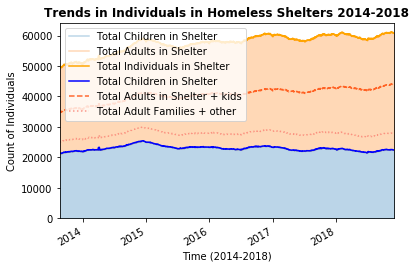

In [12]:
#data['Total Adults in Shelter + kids'].plot(kind='area', stacked=True, color='Red', alpha=.2)
data[['Total Children in Shelter','Total Adults in Shelter']].plot(kind='area', stacked=True, alpha=.3, legend=False)
data['Total Individuals in Shelter'].plot(color='Orange')
data['Total Children in Shelter'].plot(color='Blue')
data['Total Adults in Shelter + kids'].plot(kind='line', stacked=True, color='OrangeRed', alpha=.8, linestyle='--')
data['Total Adult Families + other'].plot(kind='line', stacked=True, color='Salmon', alpha=.8, linestyle=':')
plt.legend()
plt.title('Trends in Individuals in Homeless Shelters 2014-2018', fontweight='bold')
plt.xlabel('Time (2014-2018)')
plt.ylabel('Count of Individuals')

Text(0,0.5,'Count of Individuals')

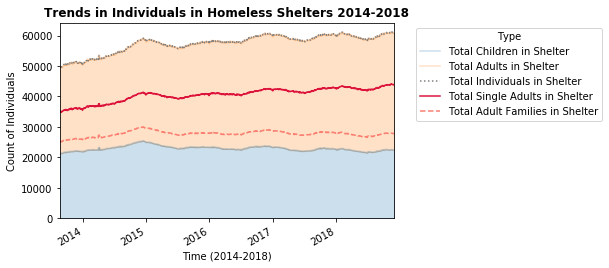

In [31]:
#data['Total Adults in Shelter + kids'].plot(kind='area', stacked=True, color='Red', alpha=.2)
data[['Total Children in Shelter','Total Adults in Shelter']].plot(kind='area', stacked=True, alpha=.23)
data['Total Individuals in Shelter'].plot(color='Gray', legend=False, linestyle=':')
#data['Total Children in Shelter'].plot(color='Blue', legend=False)
data['Total Adults in Shelter + kids'].plot(kind='line', stacked=True, color='Crimson', alpha=1, label='Total Single Adults in Shelter')
data['Total Adult Families + other'].plot(kind='line', stacked=True, color='Salmon', alpha=1, linestyle='--', label='Total Adult Families in Shelter')
plt.legend(loc=2,title='Type', bbox_to_anchor=(1.05, 1))
plt.title('Trends in Individuals in Homeless Shelters 2014-2018', fontweight='bold')
plt.xlabel('Time (2014-2018)')
plt.ylabel('Count of Individuals')

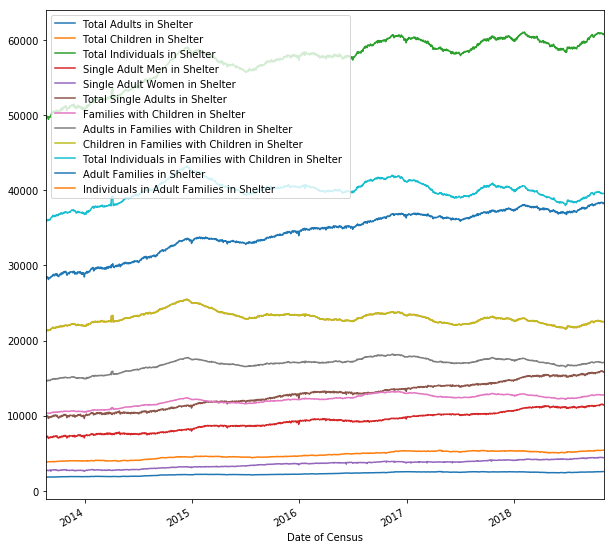

In [27]:
plt.figure(figsize(10,10))
data.plot()

In [79]:
data.plot?